# Exploratory Data Analysis, Linear Regression, and Time Series Modeling with COVID19 Worldwide Aggregated Data. 

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f


In [1]:
# first step get data
!wget https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv

--2020-04-04 10:39:28--  https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.208.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.208.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3459 (3.4K) [text/plain]
Saving to: ‘worldwide-aggregated.csv’

worldwide-aggregate 100%[===================>]   3.38K  --.-KB/s    in 0s      

2020-04-04 10:39:28 (21.0 MB/s) - ‘worldwide-aggregated.csv’ saved [3459/3459]



In [2]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# open csv file 
covid_data = pd.read_csv('worldwide-aggregated.csv')
# get shape of data
covid_data.shape

(73, 5)

In [4]:
# get info about dataframe
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
Date             73 non-null object
Confirmed        73 non-null int64
Recovered        73 non-null int64
Deaths           73 non-null int64
Increase rate    72 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.9+ KB


In [5]:
# check out the head of the data
covid_data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [6]:
# check out the tail
covid_data.tail()

,Date,Confirmed,Recovered,Deaths,Increase rate
68,2020-03-30,782365,164566,37582,8.644151
69,2020-03-31,857487,178034,42107,9.601912
70,2020-04-01,932605,193177,46809,8.760249
71,2020-04-02,1013157,210263,52983,8.637312
72,2020-04-03,1095917,225796,58787,8.168527


In [7]:
# fill in missing values
covid_data = covid_data.fillna(0)
covid_data[:5]

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,0.000000
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [8]:
# get descriptive stats on the data
covid_data.describe()

,Confirmed,Recovered,Deaths,Increase rate
count,7.300000e+01,73.000000,73.000000,73.000000
mean,1.869322e+05,50917.301370,8117.479452,11.749869
std,2.581289e+05,56122.424872,13159.911690,14.818874
min,5.550000e+02,28.000000,17.000000,0.000000
25%,4.015000e+04,3244.000000,906.000000,2.806015
50%,8.274600e+04,33277.000000,2814.000000,8.432166
75%,1.815740e+05,78088.000000,7126.000000,12.179381
max,1.095917e+06,225796.000000,58787.000000,90.570550


In [9]:
# set date to index
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data = covid_data.set_index('Date')

Text(0, 0.5, 'Deaths')

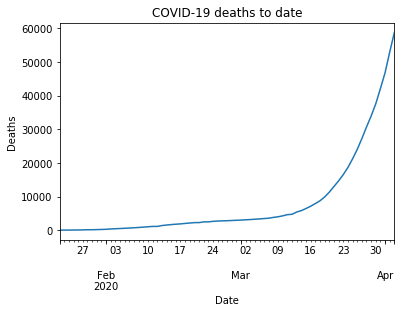

In [10]:
# real quick, let's do a line plot of deaths over time
covid_data['Deaths'].plot.line()
plt.title('COVID-19 deaths to date')
plt.ylabel('Deaths')

Text(0, 0.5, '% of recovered patients')

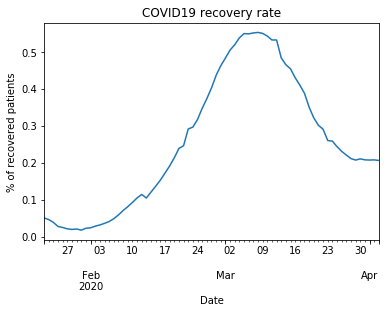

In [11]:
# calculate recovery Rate
(covid_data['Recovered'] / covid_data['Confirmed']).plot.line()
plt.title("COVID19 recovery rate")
plt.ylabel('% of recovered patients')

Text(0.5, 1.0, 'Aggregated worldwide COVID-19 mortality rate')

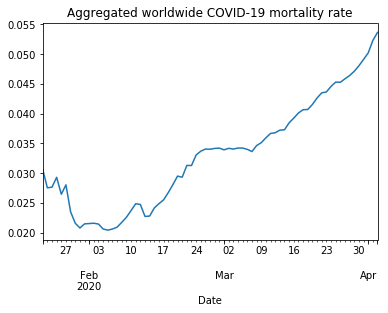

In [12]:
# calculate mortality rate
(covid_data['Deaths'] / covid_data['Confirmed']).plot.line()
plt.title("Aggregated worldwide COVID-19 mortality rate")

Text(0.5, 1.0, 'Increase in COVID-19 cases worldwide')

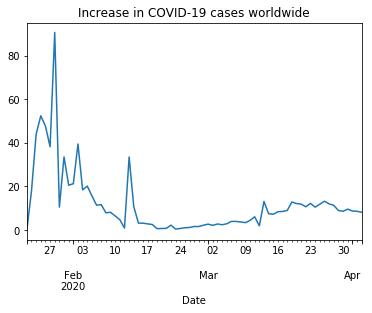

In [13]:
# plot increase rate
covid_data['Increase rate'].plot.line()
plt.title("Increase in COVID-19 cases worldwide")

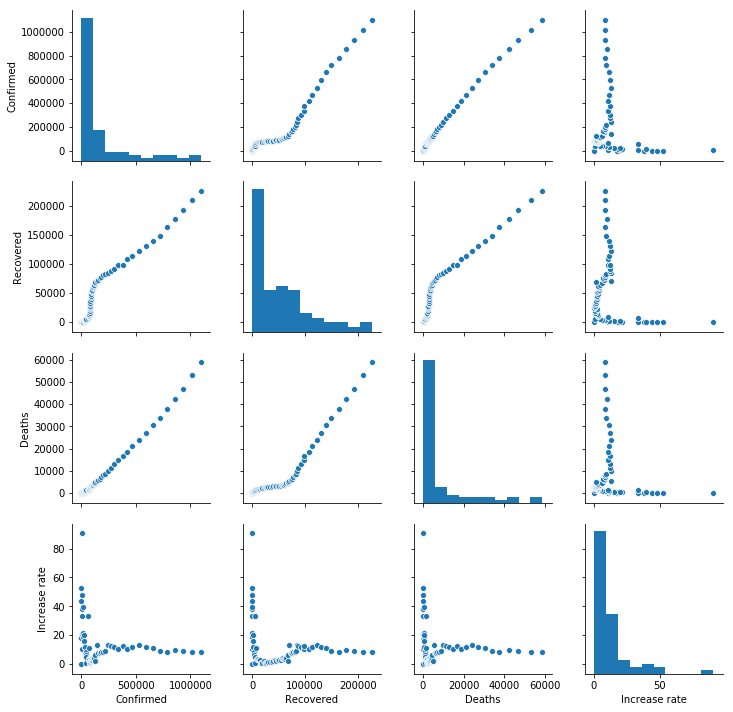

In [14]:
# Use seaborn pairplot to visualize correlations in covid-19 dataset
sns.pairplot(covid_data)

In [15]:
# just the numbers on how the variables correlate
covid_data.corr()

,Confirmed,Recovered,Deaths,Increase rate
Confirmed,1.000000,0.953191,0.997021,-0.141791
Recovered,0.953191,1.000000,0.939425,-0.225956
Deaths,0.997021,0.939425,1.000000,-0.113896
Increase rate,-0.141791,-0.225956,-0.113896,1.000000


In [16]:
# use highest corr var as X 
X = covid_data['Confirmed'].values.reshape(-1,1)
y = covid_data['Deaths'].values.reshape(-1,1)

In [17]:
# split the data 80% in train and 20% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [18]:
# check to make sure X and y have the same shape
X_train.shape, y_train.shape

((58, 1), (58, 1))

In [19]:
# fit regression model to training data
lr = LinearRegression().fit(X_train, y_train)

In [20]:
# display intercept and coef
print('intercept:', lr.intercept_, 'coef:', lr.coef_)

intercept: [-1364.43905683] coef: [[0.05094851]]


In [21]:
# now predict values of regression set 
y_pred = lr.predict(X_test)

In [22]:
# create and display a dataframe with actual and predicted numbers of deaths
df = pd.DataFrame({'Actual # of Deaths': y_test.flatten(), 'Predicted # of Deaths': y_pred.flatten()})
df

,Actual # of Deaths,Predicted # of Deaths
0,1013,814.221340
1,7905,8677.615139
2,259,-751.120834
3,42107,42323.250190
4,7126,7886.486598
5,1868,2367.947252
6,3085,3236.517535
7,2629,2689.075742
8,2708,2732.127237
9,14651,15802.815904


In [23]:
# now let's look at the error in this model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 544.5951464595004
Mean Squared Error: 449690.9172949512
Root Mean Squared Error: 670.5899770313833


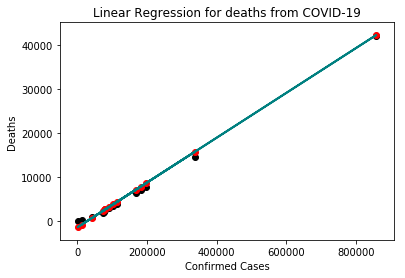

In [24]:
# linear regression line plot with test data
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred,  color='red')
plt.plot(X_test, y_pred,  color='teal',linewidth=2)

plt.title('Linear Regression for deaths from COVID-19')  
plt.xlabel('Confirmed Cases')  
plt.ylabel('Deaths')

plt.show()

In [25]:
# Use score to get accuracy of model
score = lr.score(X_test, y_test)
print('Model accuracy score:', score)

Model accuracy score: 0.9956358982739075


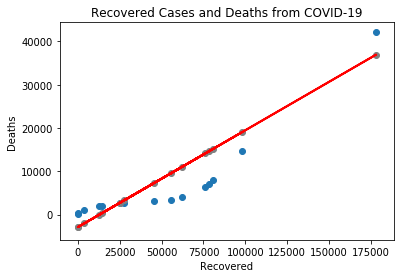

intercept: [-2913.11967823] coef: [[0.22390654]]
Mean Absolute Error: 4189.1902160222335
Mean Squared Error: 23550258.421418212
Root Mean Squared Error: 4852.860849171158
Model accuracy score: 0.7714525255589623


In [26]:
# Now let's redraw the line for the second highest correlated var, Recovered
X = covid_data['Recovered'].values.reshape(-1,1)
y = covid_data['Deaths'].values.reshape(-1,1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

#from sklearn.linear_model import LogisticRegression
# fit regression model to training data
lr = LinearRegression().fit(X_train, y_train)

# now predict values of regression set 
y_pred = lr.predict(X_test)

# Display dataframe of actual and predicted # of deaths
df = pd.DataFrame({'Actual # of Deaths': y_test.flatten(), 'Predicted # of Deaths': y_pred.flatten()})
df

# linear regression line plot with test data
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='gray')
plt.plot(X_test, y_pred, color='red',linewidth=2)
plt.title('Recovered Cases and Deaths from COVID-19')  
plt.xlabel('Recovered')  
plt.ylabel('Deaths')  

plt.show()

# display intercept and coef
print('intercept:', lr.intercept_, 'coef:', lr.coef_)
#print()

# display error 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Use score to get accuracy of model
score = lr.score(X_test, y_test)
print('Model accuracy score:', score)

In [27]:
# check column titles
covid_data.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Increase rate'], dtype='object')

In [29]:
# Let's try to use the ARIMA and ARMA models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [45]:
# a different way to set date to index
data = pd.read_csv('worldwide-aggregated.csv', index_col="Date")

# fill empty obs with zero
data = data.fillna(0)

# create a log of y
log_deaths = np.log(data['Deaths'])
log_recovered = np.log(data['Recovered'])
log_confirmed = np.log(covid_data['Confirmed'])

np.exp(log_deaths).head()

Date
2020-01-22    17.0
2020-01-23    18.0
2020-01-24    26.0
2020-01-25    42.0
2020-01-26    56.0
Name: Deaths, dtype: float64

In [31]:
# fit model
arma = ARMA(log_deaths, order=(2, 1, 2)).fit()
# make prediction
arma_y_pred = arma.predict()
# make dataframe with predicted and actual values
df = pd.DataFrame({'Predicted': np.exp(arma_y_pred), 'Actual': np.exp(log_deaths)})
# display last five
df[-5:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Predicted,Actual
2020-03-30,37593.436641,37582.0
2020-03-31,41468.531603,42107.0
2020-04-01,46474.069707,46809.0
2020-04-02,51552.513117,52983.0
2020-04-03,58568.531582,58787.0


In [32]:
# get summary of model 
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Deaths   No. Observations:                   73
Model:                     ARMA(2, 1)   Log Likelihood                  81.502
Method:                       css-mle   S.D. of innovations              0.073
Date:                Sat, 04 Apr 2020   AIC                           -153.005
Time:                        10:39:38   BIC                           -141.553
Sample:                    01-22-2020   HQIC                          -148.441
                         - 04-03-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8042      4.828      0.995      0.323      -4.659      14.267
ar.L1.Deaths     1.9887      0.011    179.611      0.000       1.967       2.010
ar.L2.Deaths    -0.9892      0.011    -89.848      0.000      -1.011      -0.968
ma.L1.Deaths    -0.6970      0.080     -8.712      0.000      -0.854      -0.540
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0052           -0.0227j            1.0054           -0.0036
AR.2            1.0052           +0.0227j            1.0054            0.0036
MA.1            1.4347           +0.0000j            1.4347            0.0000
-----------------------------------------------------------------------------
"""

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Text(0.5, 1.0, 'COVID-19 deaths forecast')

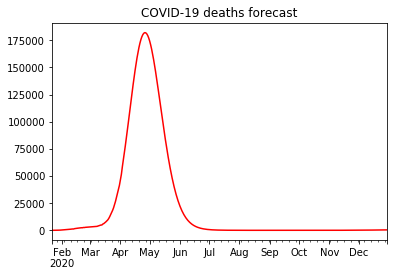

In [72]:
# forecast the number of deaths 
deaths_forecast = arma.predict(start='2020-01-22', end='2020-12-30')
# plot the forecast
np.exp(deaths_forecast).plot.line(color='red')
plt.title("COVID-19 deaths forecast")

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


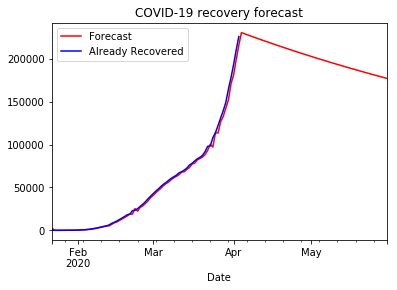

In [73]:
# fit model for recovery forecast
arma_recovered = ARMA(log_recovered, order=(1,1,0)).fit()
# make prediction
arma_y_pred = arma_recovered.predict()
# make dataframe with predicted and actual values
df = pd.DataFrame({'Predicted': np.exp(arma_y_pred), 'Actual': np.exp(log_recovered)})
# display last five
df[-5:]
# forecast the number of deaths 
recovered_forecast = arma_recovered.predict(start='2020-01-22', end='2020-5-30')
# plot
np.exp(recovered_forecast).plot.line(color='red', label='Forecast')
covid_data['Recovered'].plot(color='blue', label='Already Recovered')
plt.title('COVID-19 recovery forecast')

plt.legend()

In [52]:
arma_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Recovered   No. Observations:                   73
Model:                     ARMA(1, 1)   Log Likelihood                  39.278
Method:                       css-mle   S.D. of innovations              0.134
Date:                Sat, 04 Apr 2020   AIC                            -70.555
Time:                        10:46:20   BIC                            -61.393
Sample:                    01-22-2020   HQIC                           -66.904
                         - 04-03-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.9136      4.317      1.833      0.071      -0.547      16.374
ar.L1.Recovered     0.9989      0.002    651.651      0.000       0.996       1.002
ma.L1.Recovered     0.5290      0.089      5.964      0.000       0.355       0.703
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           +0.0000j            1.0011            0.0000
MA.1           -1.8904           +0.0000j            1.8904            0.5000
-----------------------------------------------------------------------------
"""

In [53]:
# now let's do fit an arima model 
arima= ARIMA(log_deaths, order=(2, 1,0)).fit() #random walk 
# make prediction
arima_y_pred = arima.predict()
# display table with predicted and actual values
df = pd.DataFrame({'ARIMA Predicted': np.exp(arima_y_pred), 'Actual': np.exp(log_deaths)})
df[-5:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,ARIMA Predicted,Actual
2020-03-30,1.117927,37582.0
2020-03-31,1.111517,42107.0
2020-04-01,1.116581,46809.0
2020-04-02,1.117564,52983.0
2020-04-03,1.122173,58787.0


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


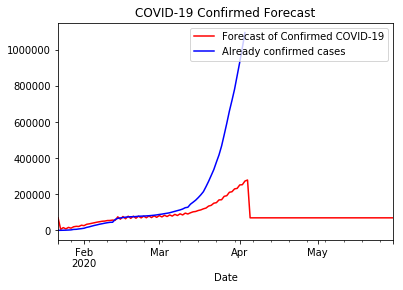

In [65]:
# forecast confirmed number of cases of covid-19
arma_confirmed = ARMA(log_confirmed, order=(0,1,1)).fit()
confirmed_forecast = arma_confirmed.predict(start='2020-01-22', end='2020-5-30')

# plot the forecast against the actual number of confirmed cases so far
np.exp(confirmed_forecast).plot.line(color='red', label='Forecast of Confirmed COVID-19')
covid_data['Confirmed'].plot(color='blue', label='Already confirmed cases')
plt.title('COVID-19 Confirmed Forecast')

plt.legend()

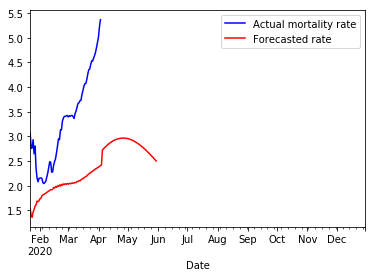

In [75]:
# plot current mortality rate plotted against the forecast
(covid_data['Deaths'] / covid_data['Confirmed']*100).plot.line(color='blue', label='Actual mortality rate' )
np.exp((deaths_forecast/confirmed_forecast)).plot.line(color='red', label='Forecasted rate')

plt.legend()

In [74]:
# last 60 forecasted dates
np.exp(deaths_forecast)[-60:]

2020-11-01     21.998595
2020-11-02     23.279305
2020-11-03     24.641420
2020-11-04     26.089609
2020-11-05     27.628741
2020-11-06     29.263884
2020-11-07     31.000306
2020-11-08     32.843469
2020-11-09     34.799028
2020-11-10     36.872827
2020-11-11     39.070886
2020-11-12     41.399399
2020-11-13     43.864720
2020-11-14     46.473348
2020-11-15     49.231918
2020-11-16     52.147177
2020-11-17     55.225970
2020-11-18     58.475213
2020-11-19     61.901874
2020-11-20     65.512937
2020-11-21     69.315381
2020-11-22     73.316142
2020-11-23     77.522076
2020-11-24     81.939924
2020-11-25     86.576269
2020-11-26     91.437494
2020-11-27     96.529731
2020-11-28    101.858818
2020-11-29    107.430243
2020-11-30    113.249095
2020-12-01    119.320006
2020-12-02    125.647096
2020-12-03    132.233917
2020-12-04    139.083393
2020-12-05    146.197760
2020-12-06    153.578513
2020-12-07    161.226341
2020-12-08    169.141078
2020-12-09    177.321640
2020-12-10    185.765979
